# **Random Forest e Bagging**

Inicialmente é necessário realizar a importação e o preparo dos dados:

In [ ]:
#Importação dos dados:

import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)

dados['smoker'] = dados['smoker'].map({'yes':1, 'no':0})
dados['charges']=dados['charges']/1000
dados = dados[['bmi','charges','smoker']]
dados.head()

x=dados[['bmi','charges']]
y=dados['smoker']

**Upgrade na técnica de validação: K-Fold repetido**

In [ ]:
#Validação cruzada

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

validacao = RepeatedStratifiedKFold (n_splits= 10, n_repeats=3)

Analisando o modelo **Bagging**:


In [ ]:
#Bagging:

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

modelo_base = DecisionTreeClassifier()

modelo= BaggingClassifier(n_estimators=50)
medidas = cross_validate(modelo,x,y,cv = validacao, scoring='accuracy')
round(medidas['test_score'].mean(),4)


0.9537

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


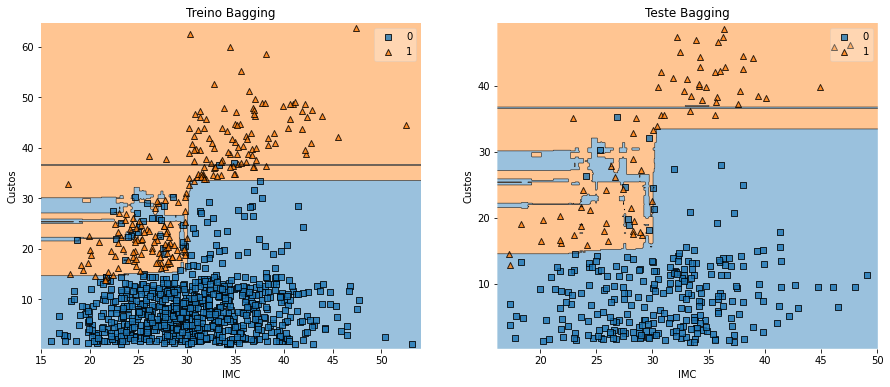

In [ ]:
#Região de Decisão

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

xtreino, xteste, ytreino, yteste = train_test_split(x,y,test_size=0.25)
modelo.fit(xtreino,ytreino)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot_decision_regions(xtreino.values,ytreino.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Treino Bagging')

plt.subplot(1,2,2)
plot_decision_regions(xteste.values,yteste.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Teste Bagging')

plt.show()

É possível observar pela Região de Decisão Teste que o modelo teve um bom ajuste, visto que os dados dos triângulos laranjas estão sobrepostos com o valor do modelo (fundo laranja). Analogamente, pode-se inferir que os dados dos quadrados azuis estão ajustados ao modelo de forma satisfatória, pois estão sobre a região do modelo em azul.

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo=RandomForestClassifier(n_estimators=200,
                              max_features='auto',
                              bootstrap= True, 
                              max_depth= 4,
                              min_samples_split=10)

medidas=cross_validate(modelo, x, y, cv=validacao, scoring='accuracy')
round(medidas['test_score'].mean(),4)

0.9626

Outros valores de parâmetro foram utilizados> n_estimators=100, 200 e 300; max_depth=2,4 e 6; min_samples_split=10 e 20. 
Os melhores resultados obtidos para a acurácia foram com n_estimators=300, max_depth=4 e min_samples_split=10.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


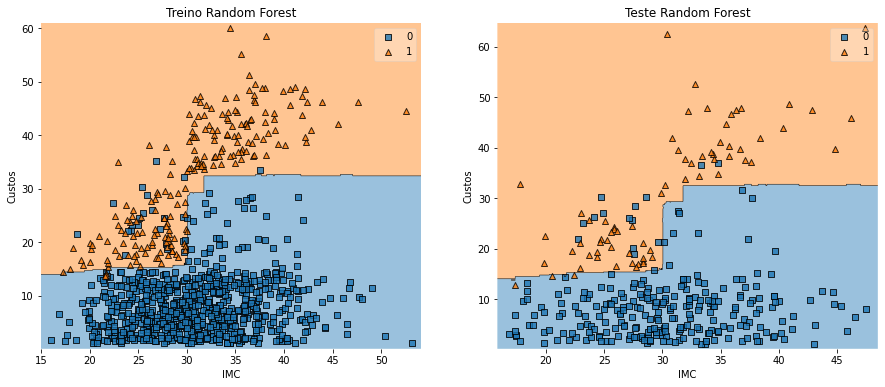

In [ ]:
#Região de decisão:

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

xtreino, xteste, ytreino, yteste = train_test_split(x,y,test_size=0.25)
modelo.fit(xtreino,ytreino)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot_decision_regions(xtreino.values,ytreino.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Treino Random Forest')

plt.subplot(1,2,2)
plot_decision_regions(xteste.values,yteste.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Teste Random Forest')

plt.show()

**Análise da Importância das variáveis: Feature importance**





In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo_base=RandomForestClassifier (max_depth=4)
modelo_base.fit(x,y)




RandomForestClassifier(max_depth=4)

In [ ]:
modelo_base.feature_importances_

array([0.08280274, 0.91719726])

In [ ]:
variaveis=pd.DataFrame()
variaveis['variavel']=x.columns
variaveis['importância']=modelo_base.feature_importances_
variaveis

,variavel,importância
0,bmi,0.082803
1,charges,0.917197


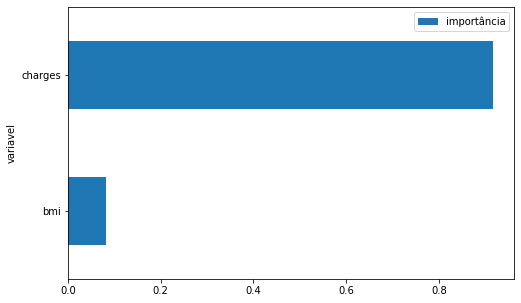

In [ ]:
variaveis.sort_values(by='importância', ascending=True, inplace=True)
variaveis.set_index('variavel', inplace=True)
variaveis.plot(kind='barh', figsize=(8,5));

Neste caso, o intuito era analisar o grau de influência que as variáveis preditoras (bmi e charges) têm na determinação da variável resposta (smoker).
A variável "charges" tem mais de 10x influência na determinação dos fumantes do que a bmi, como é possível observar pelo gráfico acima.